### Importing Libraries and Dataset

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_excel('Retailers data.xlsx')

### General dataset checking

In [11]:
df.head()

,Store name,Deadstock,Source,Highest selling products,Lowest Selling products,General price,No. of stores,Stock refreshing,Discount,Customization,Trends
0,Biba,Clearance sale,Warehouse,Suits,Sleepwear,6000.0,150.0,3.0,0.50,No,Fusion
1,Zari,Clearance sale,Wholesale operations,Sarees,Kurtis,20000.0,5.0,3.0,0.70,Yes,Block prints
2,Shahi Libas,Wholesalers,Artisans,Sherwanis,Tuxedos,15000.0,1.0,4.0,0.15,Yes,Jodhpuri designs
3,Manyavar,Clearance sale,Warehouse,Kurtas,Jacket sets,35000.0,500.0,4.0,0.30,No,NaN
4,Gulab Chand,Wholesalers,Warehouse,Kurtis,Tops,10000.0,5.0,2.0,0.00,No,Block prints


In [12]:
df.describe()

,General price,No. of stores,Stock refreshing,Discount
count,10.000000,10.000000,10.000000,10.000000
mean,10400.000000,196.000000,3.100000,0.525000
std,10426.462061,185.849999,0.737865,0.289875
min,2000.000000,1.000000,2.000000,0.000000
25%,3250.000000,5.000000,3.000000,0.350000
50%,6000.000000,225.000000,3.000000,0.600000
75%,13750.000000,325.500000,3.750000,0.775000
max,35000.000000,500.000000,4.000000,0.800000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Store name                10 non-null     object 
 1   Deadstock                 10 non-null     object 
 2   Source                    10 non-null     object 
 3   Highest selling products  11 non-null     object 
 4   Lowest Selling products   10 non-null     object 
 5   General price             10 non-null     float64
 6   No. of stores             10 non-null     float64
 7   Stock refreshing          10 non-null     float64
 8   Discount                  10 non-null     float64
 9   Customization             10 non-null     object 
 10  Trends                    8 non-null      object 
dtypes: float64(4), object(7)
memory usage: 1.2+ KB


In [14]:
df.columns

Index(['Store name', 'Deadstock', 'Source', 'Highest selling products',
       'Lowest Selling products', 'General price', 'No. of stores',
       'Stock refreshing', 'Discount', 'Customization', 'Trends'],
      dtype='object')

### Analysing Dataset

##### Brands and how they clear their deadstock

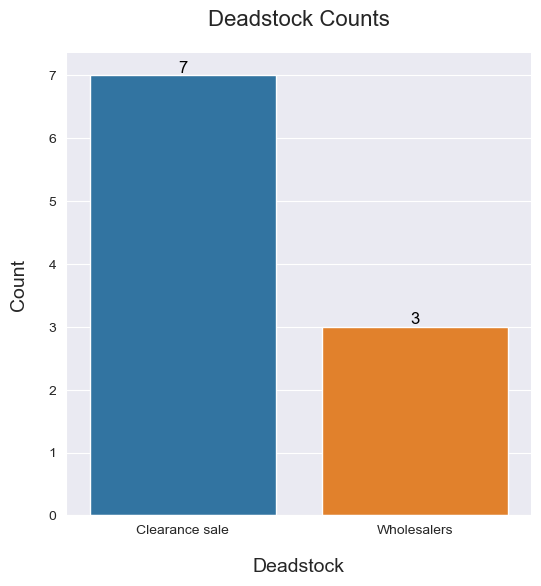

In [66]:
sns.set_style('darkgrid')
colors = ['#1f77b4', '#ff7f0e']
plt.figure(figsize=(6, 6))

ax = sns.countplot(x=df['Deadstock'], palette=colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black')

ax.set_xlabel('Deadstock', fontsize=14, labelpad=15)
ax.set_ylabel('Count', fontsize=14, labelpad=15)
ax.set_title('Deadstock Counts', fontsize=16, pad=20)

sns.despine()
plt.show()

##### How brands source their products

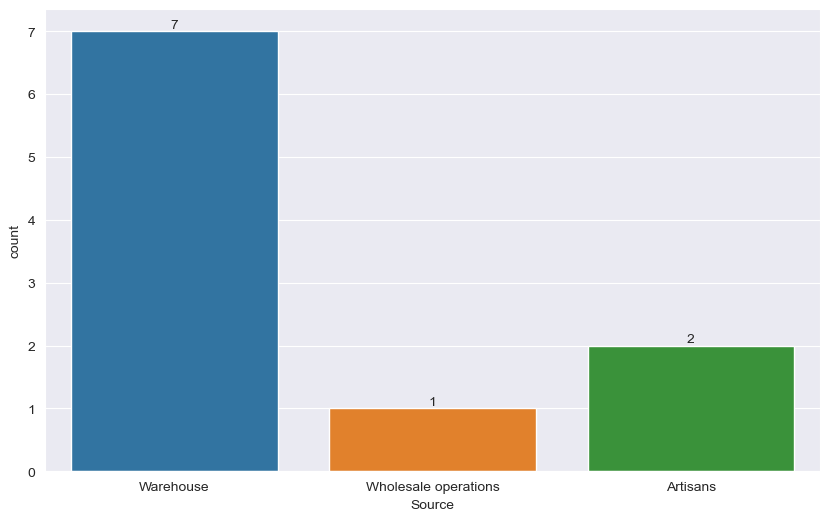

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))

ax = sns.countplot(x=df['Source'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

##### highest selling products

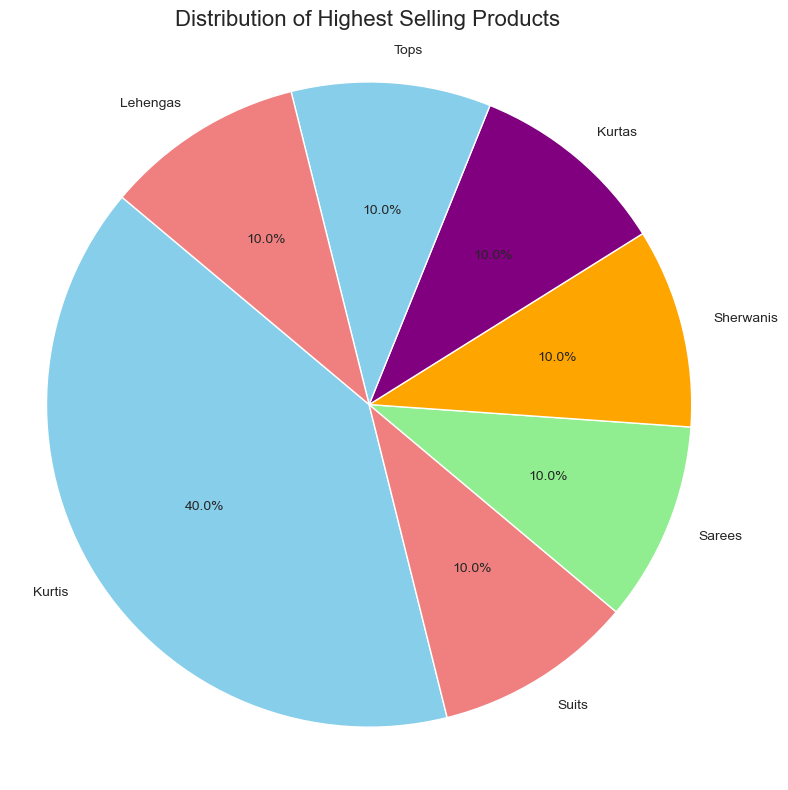

In [67]:
product_counts = df['Highest selling products'][:-1].value_counts()
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'purple']
plt.figure(figsize=(8, 8))

plt.pie(product_counts, labels=product_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Highest Selling Products', fontsize=16)

plt.tight_layout()
plt.show()

##### Lowest selling Products

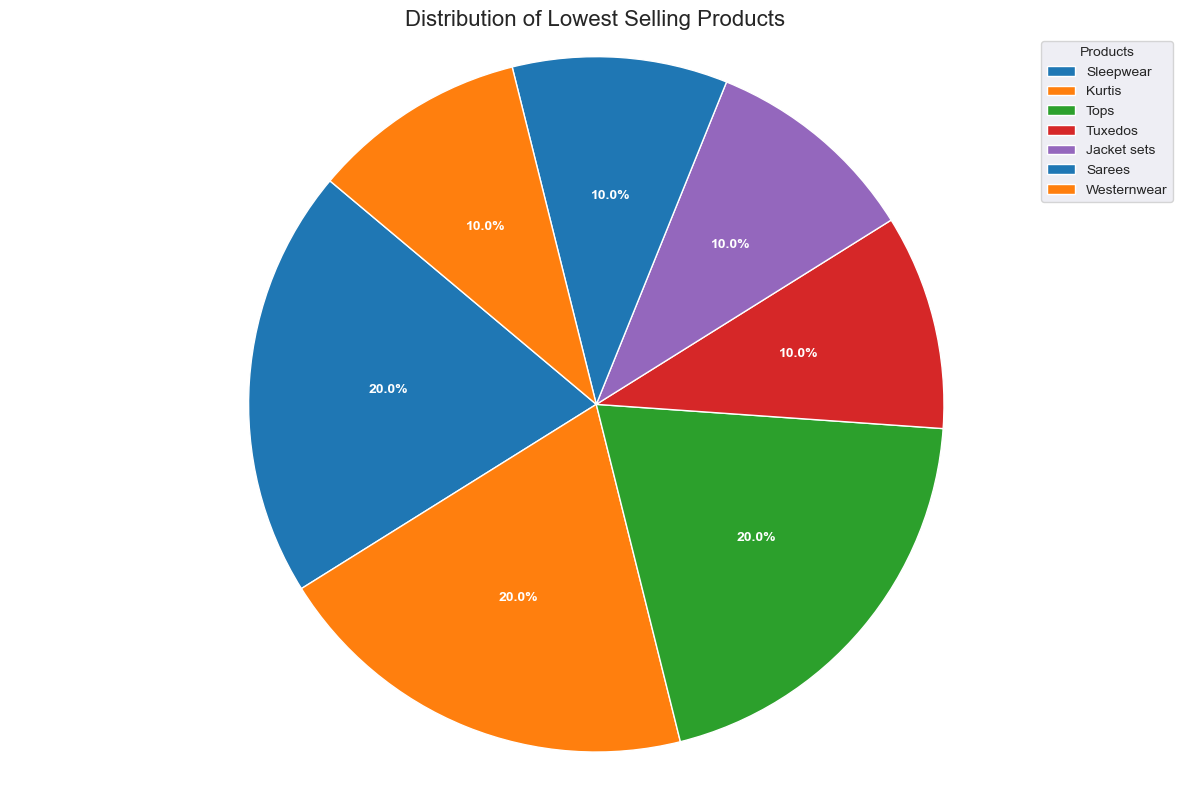

In [68]:
product_counts = df['Lowest Selling products'][:-1].value_counts()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.figure(figsize=(12, 8))

wedges, texts, autotexts = plt.pie(product_counts, labels=product_counts.index, colors=colors, autopct='%1.1f%%', startangle=140,
        textprops={'color': 'white', 'weight': 'bold'})

for text, autotext in zip(texts, autotexts):
    percentage = autotext.get_text()  
    count = text.get_text()  
    label_text = f'{count} - {percentage}'
    text.set_text(label_text)

plt.axis('equal')
plt.title('Distribution of Lowest Selling Products', fontsize=16)
plt.legend(product_counts.index, title='Products', loc='upper right')
plt.tight_layout()
plt.show()

##### Average price

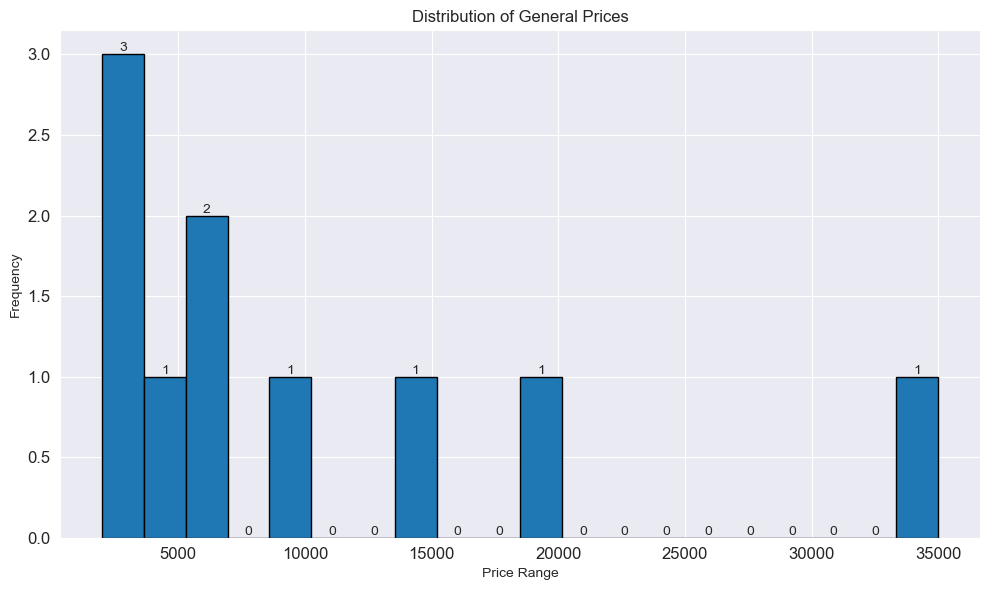

In [69]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['General price'], bins=20, edgecolor='black')

plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.title('Distribution of General Prices')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for value, patch in zip(n, patches):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height, f'{int(value)}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
